In [1]:
import torch
import torch.nn.functional as F
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
#Transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5), (0.5))])
trainset = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
images, labels = next(iter(trainloader))
images.shape

torch.Size([64, 1, 28, 28])

In [4]:
model = nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                     nn.Linear(256, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.resize_(images.shape[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                images = images.resize_(images.shape[0], 784)
                log_ps = model.forward(images)
                test_loss += criterion(log_ps, labels) 
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training Loss: {:.3f}".format(running_loss/len(trainloader)),
              "Testing Loss: {:.3f}".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30... Training Loss: 0.518 Testing Loss: 0.433 Test Accuracy: 0.841
Epoch: 2/30... Training Loss: 0.394 Testing Loss: 0.426 Test Accuracy: 0.844
Epoch: 3/30... Training Loss: 0.359 Testing Loss: 0.375 Test Accuracy: 0.865
Epoch: 4/30... Training Loss: 0.333 Testing Loss: 0.382 Test Accuracy: 0.862
Epoch: 5/30... Training Loss: 0.318 Testing Loss: 0.360 Test Accuracy: 0.871
Epoch: 6/30... Training Loss: 0.307 Testing Loss: 0.372 Test Accuracy: 0.870
Epoch: 7/30... Training Loss: 0.293 Testing Loss: 0.363 Test Accuracy: 0.874
Epoch: 8/30... Training Loss: 0.279 Testing Loss: 0.372 Test Accuracy: 0.874
Epoch: 9/30... Training Loss: 0.275 Testing Loss: 0.374 Test Accuracy: 0.874
Epoch: 10/30... Training Loss: 0.265 Testing Loss: 0.388 Test Accuracy: 0.867
Epoch: 11/30... Training Loss: 0.258 Testing Loss: 0.348 Test Accuracy: 0.878
Epoch: 12/30... Training Loss: 0.253 Testing Loss: 0.373 Test Accuracy: 0.876
Epoch: 13/30... Training Loss: 0.249 Testing Loss: 0.370 Test Accuracy: 0

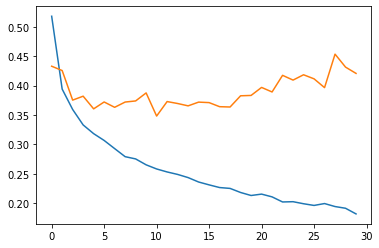

In [5]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')

In [6]:
import numpy as np
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

/Users/dasaprakash/miniforge3/envs/venv_nbook/lib/python3.9/site-packages/torch/_tensor.py:549: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


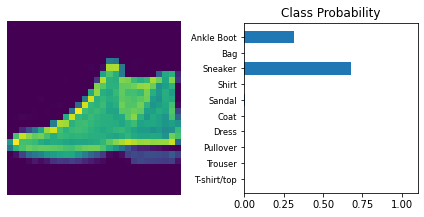

In [7]:
import torch.nn.functional as F
images, labels = next(iter(testloader))
img = images[0].resize(1, 784)
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits, dim=1)
view_classify(img.view(1,28,28), ps, version='Fashion')